# Data Science and Business Analytics Internship at The Spark Foundation

# Task2 : Prediction using Unsupervised Machine Learning

### Mohit Raje 
### Spetember 2022 Batch
### #GRIPSEPT2022

## Problem Statement : From given 'Iris' dataset , predict the optimum number of clusters and represent it visually 

### 2.1 Import Libraries
### 2.2 Import Dataset
### 2.3 Analyzing the data
### 2.4 Data Visualiztion
### 2.5 Finding the optimum number of clusters
### 2.6 Training the algorithm
### 2.7 Plotting the prediction
### 2.8 Conclusion

## 2.1 Import Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn.cluster import KMeans

## 2.2 Import Dataset

In [72]:
iris_dataset=datasets.load_iris()
df=pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 2.3 Analyzing the dataset

In [73]:
df.head(7)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3


In [74]:
df.tail(7)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [75]:
# Understanding the statistical information
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:
# Understanding the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [77]:
# Understanding the correlation
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## 2.4 Data Visualization

<AxesSubplot:>

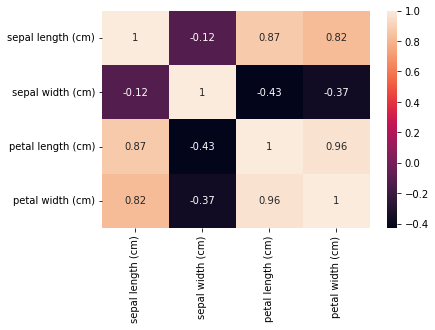

In [78]:
sb.heatmap(df.corr() , annot=True)

In [79]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


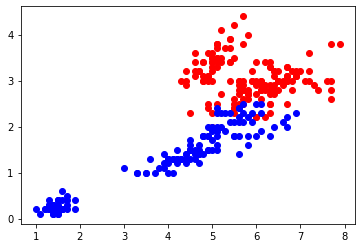

In [80]:
df1=df.iloc[: , :2]
df2=df.iloc[: , 2:]
plt.scatter(df['sepal length (cm)'] , df1['sepal width (cm)'] , color='r' )
plt.scatter(df2['petal length (cm)'] , df2['petal width (cm)'] , color='b')

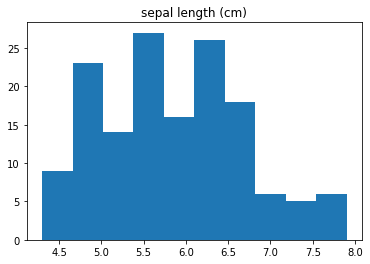

In [81]:
# histogram:

df.hist(column="sepal length (cm)"  , grid=False , )
plt.show()

array([[<AxesSubplot:title={'center':'sepal width (cm)'}>]], dtype=object)

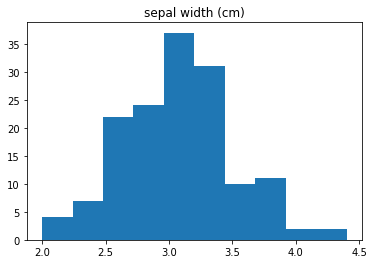

In [82]:
df.hist(column='sepal width (cm)' , grid=False)

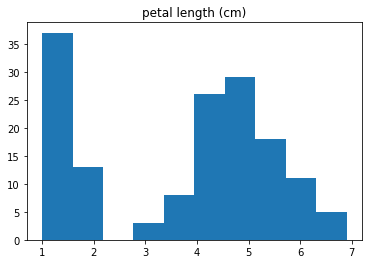

In [83]:
df.hist(column='petal length (cm)' , grid=False)
plt.show()

array([[<AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

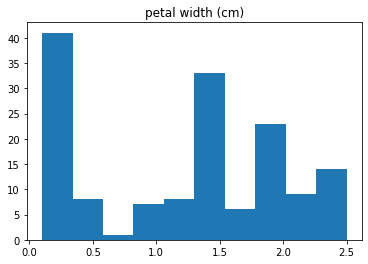

In [84]:
df.hist(column="petal width (cm)" , grid=False)

## 2.5 Finding the optimum number of clusters:

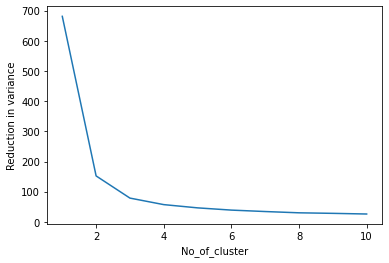

In [85]:
centroid_ls=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i , init='k-means++' , max_iter=300 , n_init=10 , random_state=0)
    kmeans.fit(df.values)
    centroid_ls.append(kmeans.inertia_)

plt.plot(range(1,11) , centroid_ls)
plt.xlabel('No_of_cluster')
plt.ylabel('Reduction in variance')
plt.show()

#### Here 3 is the elbow point and it is used to determine the value of clusters
#### At this point there is signinficant drop in variance and no such drop is observed further in the graph and hence the point 3 is considered as the elbow point
#### Hence No. of clusters (k) = 3

## 2.6 Training the algorithm

In [86]:
kmeans=KMeans(n_clusters=3 , init='k-means++' , max_iter=300 , n_init=10 , random_state=0)
centroid=kmeans.fit_predict(df.values)

In [87]:
print(centroid)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# 2.7 Plotting the predictions

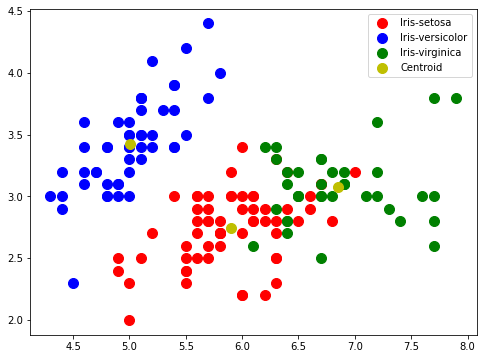

In [88]:
plt.figure(figsize=(8,6))

plt.scatter(df.values[centroid == 0 , 0] , df.values[centroid == 0 , 1] , s=100 , c='r' , label='Iris-setosa')
plt.scatter(df.values[centroid == 1 , 0] , df.values[centroid == 1 , 1] , s=100 , c='b' , label='Iris-versicolor')
plt.scatter(df.values[centroid == 2 , 0] , df.values[centroid == 2 , 1] , s=100 , c='g' , label='Iris-virginica')


plt.scatter(kmeans.cluster_centers_[: , 0] , kmeans.cluster_centers_[: , 1] , s=100 , c='y' , label='Centroid')

plt.legend()

## 2.8 Conclusion

#### Optimum number of clusters predicted = 3